# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import logging
logging.basicConfig(level=logging.INFO)

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Define batch size
batch_size = 100

# Split the data into batches
for i in range(0, len(city_data), batch_size):
    batch = city_data[i:i+batch_size]
    # Process the batch
    process_batch(batch)

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Check the length of city_data list after the loop
print(f"Total cities processed: {len(city_data)}")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | termas de rio hondo
Processing Record 3 of Set 1 | fort mcmurray
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | tual
Processing Record 6 of Set 1 | paragominas
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | selfoss
Processing Record 9 of Set 1 | broken hill
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | shyryayeve
Processing Record 13 of Set 1 | sinop
Processing Record 14 of Set 1 | hassi messaoud
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | badger
Processing Record 18 of Set 1 | mikun'
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | fisterra
Processing Record 22 of Set 1 | kerikeri
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
# Create the DataFrame
city_data_df = pd.DataFrame(city_data)


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,21.86,57,20,2.57,US,1722883005
1,termas de rio hondo,-27.4998,-64.8604,22.74,42,8,2.95,AR,1722883006
2,fort mcmurray,56.7268,-111.3810,22.73,43,0,3.60,CA,1722882779
3,iskateley,67.6803,53.1512,6.48,83,3,5.32,RU,1722883008
4,tual,-5.6667,132.7500,25.25,85,97,9.29,ID,1722883009


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,21.86,57,20,2.57,US,1722883005
1,termas de rio hondo,-27.4998,-64.8604,22.74,42,8,2.95,AR,1722883006
2,fort mcmurray,56.7268,-111.3810,22.73,43,0,3.60,CA,1722882779
3,iskateley,67.6803,53.1512,6.48,83,3,5.32,RU,1722883008
4,tual,-5.6667,132.7500,25.25,85,97,9.29,ID,1722883009


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

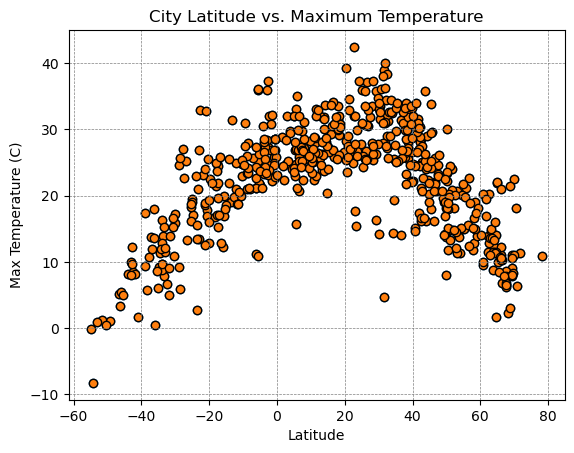

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('City Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

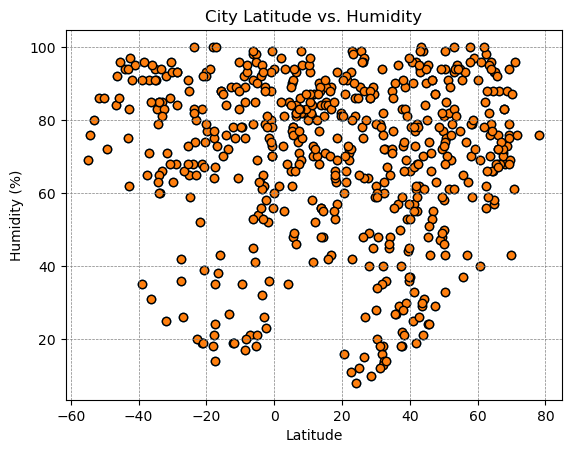

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

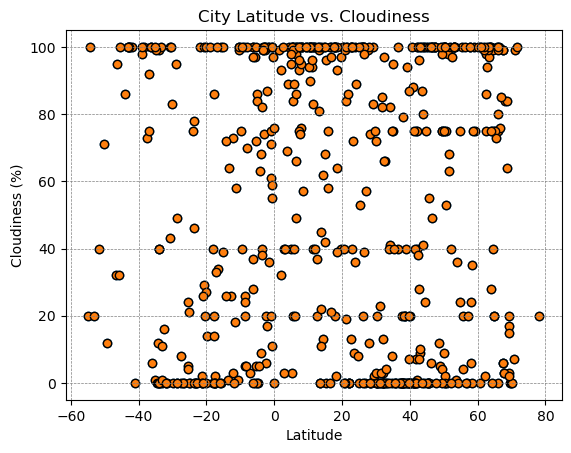

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

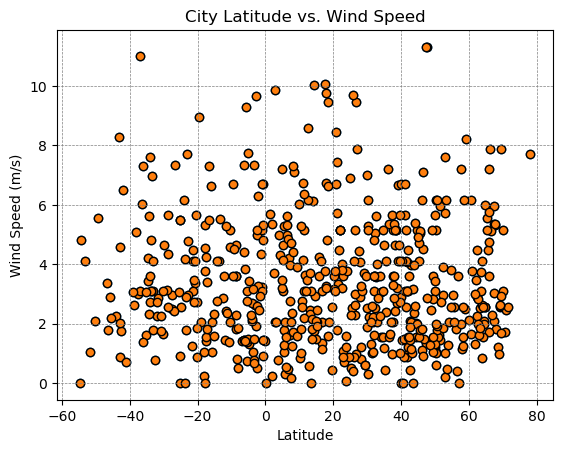

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Filter the DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.dropna()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,21.86,57,20,2.57,US,1722883005
2,fort mcmurray,56.7268,-111.3810,22.73,43,0,3.60,CA,1722882779
3,iskateley,67.6803,53.1512,6.48,83,3,5.32,RU,1722883008
7,selfoss,63.9331,-20.9971,12.25,96,100,0.83,IS,1722883012
10,ilulissat,69.2167,-51.1000,9.01,76,20,2.57,GL,1722883008


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.dropna()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,termas de rio hondo,-27.4998,-64.8604,22.74,42,8,2.95,AR,1722883006
4,tual,-5.6667,132.7500,25.25,85,97,9.29,ID,1722883009
5,paragominas,-2.9667,-47.4833,35.98,26,74,2.61,BR,1722883010
6,papatowai,-46.5619,169.4708,5.08,84,32,3.38,NZ,1722883011
8,broken hill,-31.9500,141.4333,5.01,92,0,2.27,AU,1722883013


###  Temperature vs. Latitude Linear Regression Plot

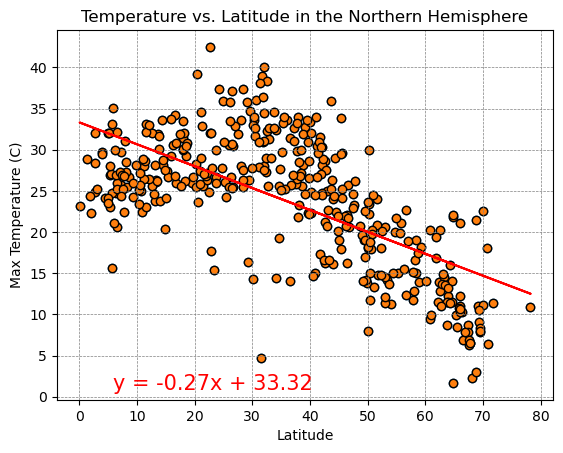

In [14]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Calculate linear regression for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Northern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Temperature vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig5.png")
plt.show()

**Discussion about the linear relationship:** Based on the graph shown above, it can be assumed that there is a negative correlation between temperature and latitude in the northern hemisphere. It is known that the average temperature increases as you get closer to the equator, and decreases as you move further away. So therefore, based on the graph as well as knowledge of the equator's effect on temperature, you can safely conclude that there is a correlation between the two, and in the northern hemisphere specifically, it is a negative correlation. 

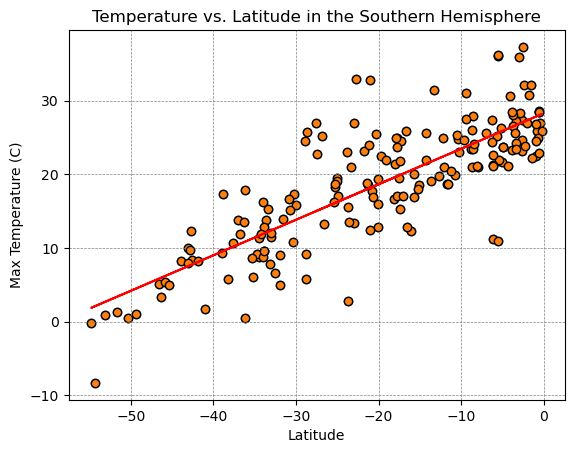

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Calculate linear regression for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Southern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Temperature vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** Based on the graph shown above, it can be assumed that there is somewhat of a positive correlation between the max temperature and latitude. It is known that the closer you get to the equator, the warmer it is, and considering the latitude is measured based on the equator, this graph does in fact illustrate that the closer to the equator you get, the warmer the temperature is.

### Humidity vs. Latitude Linear Regression Plot

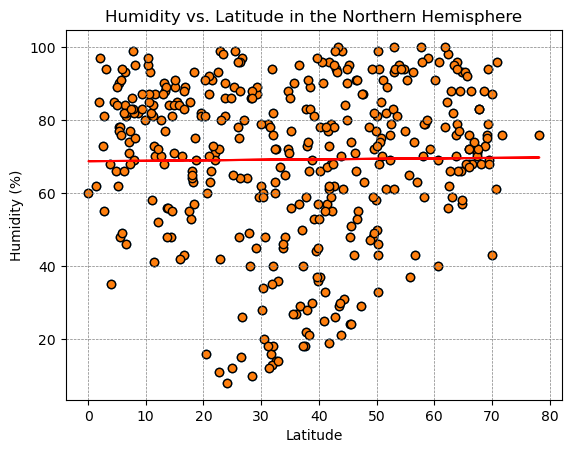

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Calculate linear regression for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Northern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Humidity vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig7.png")
plt.show()

Discussion about the linear relationship: Based on the graph above, there does not seem to be any correlation between humidity and latitude in the northern hemisphere. Based on research regarding the determining factors of humidity, latitude does play a role in it, but more specifically, water vapor in the air, which is affected by factors such as temperature, pressure, and evaporation, is the main determining factor of humidity.

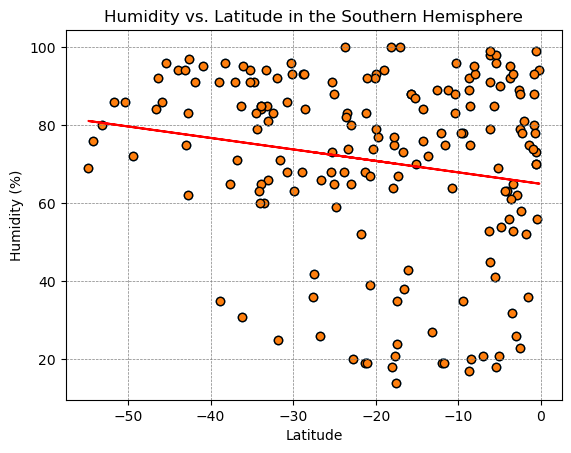

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Calculate linear regression for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Northern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Humidity vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# Save the figure
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** Similar to the previous graph illustrating the relationship between humidity vs. latitude in the northern hemisphere, humidity is not directly affected by latitude, but rather other factors in the climate. Latitude still does affect those factors, but it is not the main determining factor for humidity levels, and therefore there is no correlation between the two for either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

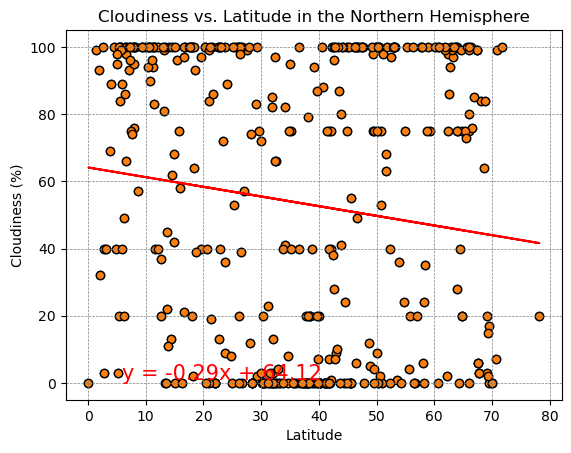

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Calculate linear regression for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Northern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig9.png")
plt.show()

**Discussion about the linear relationship:** Based on the above graph, there is no correlation between cloudiness and latitude in the northern hemisphere. Similarly to humidity levels, cloudiness in a certain area is determined by the level of water vapor in the air, and while the level of water vapor can be affected by latitude, it is not the main determining factor.

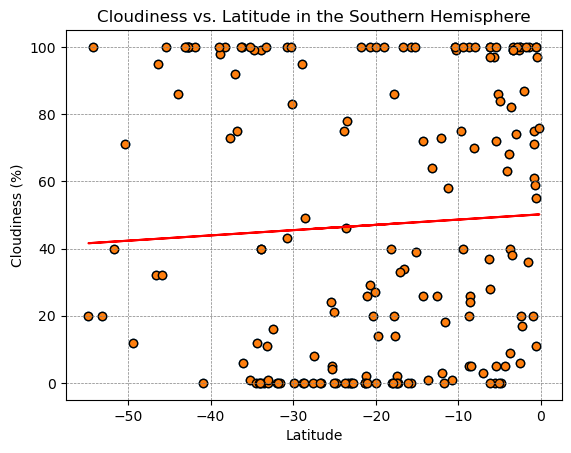

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Calculate linear regression for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Southern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Cloudiness vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** Similarly to the comparison of cloudiness and latitude in the northern hemisphere, there is no correlation between the two in the southern hemisphere as well for the same reasons.

### Wind Speed vs. Latitude Linear Regression Plot

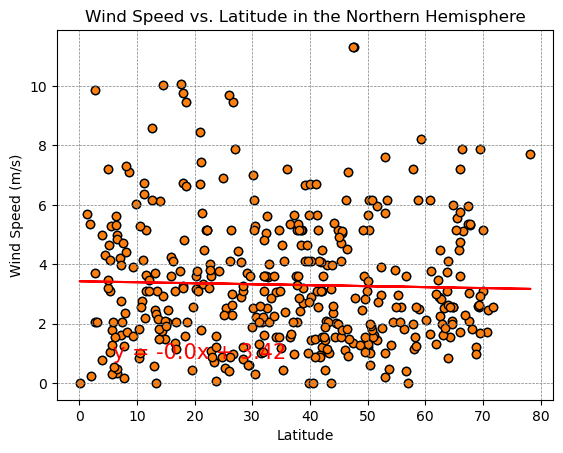

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Calculate linear regression for Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Northern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig11.png")
plt.show()

**Discussion about the linear relationship:** Based on the graph constructed, there is a very weak negative correlation between windiness and latitude in the northn hemisphere, if at all. Similarly to humidity and cloudiness, latitude does play a role in windiness, but is not the main determining factor.

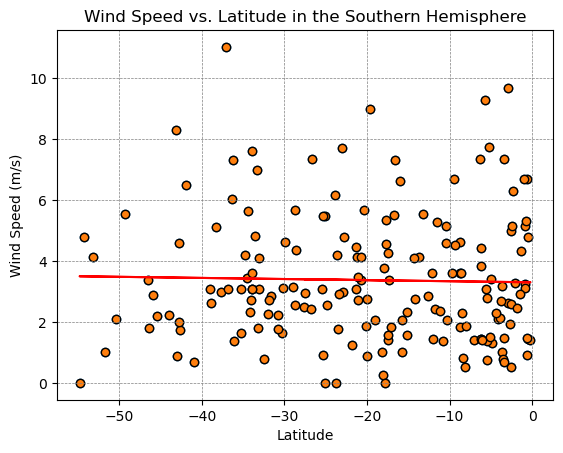

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Calculate linear regression for Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and linear regression line for Southern Hemisphere
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.scatter(x_values, y_values, edgecolor='black', linewidth=1)
plt.title('Wind Speed vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** As shown in the above graph, there is a very weak positive correlation, if any at all between wind spee and latitude in the southern hemisphere. Like previously mentioned, latitude does play a role in windiness, but is not the main determining factor.